In [11]:
import numpy as np


X = 3 * np.random.rand(100, 1)
y = 6 * X + 4 + np.random.randn(100, 1)

In [12]:
import matplotlib.pyplot as plt

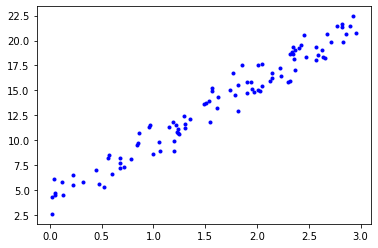

In [13]:
plt.plot(X, y, "b.")

In [5]:
arr = [1, 2, 3]

In [6]:
l = [i*2 for i in arr]

In [7]:
l

[2, 4, 6]

In [8]:
num_arr = np.array(arr)

In [9]:
num_arr

array([1, 2, 3])

In [10]:
num_arr*2

array([2, 4, 6])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.coef_

array([[5.89403521]])

In [18]:
reg.intercept_

array([4.14475898])

In [19]:
X_new = np.array([[0], [2]])

y_pred = reg.predict(X_new)

In [20]:
y_pred

array([[ 4.14475898],
       [15.93282939]])

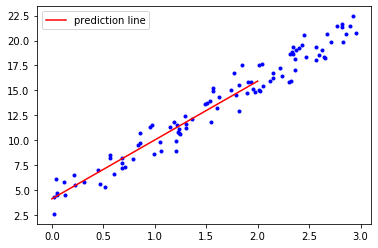

In [24]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", label="prediction line")
plt.legend(loc="best")
plt.show()

In [25]:
reg.score(X, y)

0.9575890460082839

## Under the hood

In [27]:
bias = np.ones((100, 1))
X_with_bias = np.c_[X, bias]

In [30]:
X_with_bias

array([[0.71463478, 1.        ],
       [1.56819397, 1.        ],
       [1.78542997, 1.        ],
       [2.34380046, 1.        ],
       [1.20229123, 1.        ],
       [2.12123858, 1.        ],
       [0.78763718, 1.        ],
       [2.59293595, 1.        ],
       [2.3589419 , 1.        ],
       [2.9567207 , 1.        ],
       [1.95528974, 1.        ],
       [2.32095288, 1.        ],
       [2.22069995, 1.        ],
       [2.02438174, 1.        ],
       [1.81990773, 1.        ],
       [1.2342971 , 1.        ],
       [1.06365921, 1.        ],
       [2.57097254, 1.        ],
       [2.77092587, 1.        ],
       [0.31574075, 1.        ],
       [1.19184261, 1.        ],
       [0.83908809, 1.        ],
       [1.6245125 , 1.        ],
       [2.00944962, 1.        ],
       [0.51943898, 1.        ],
       [2.3698065 , 1.        ],
       [1.76781896, 1.        ],
       [0.01850032, 1.        ],
       [1.21466723, 1.        ],
       [1.93849103, 1.        ],
       [1.

(X.T.X)^-1.X.T.y

In [28]:
theta_best = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T.dot(y))

In [29]:
theta_best

array([[5.89403521],
       [4.14475898]])

In [31]:
coeff = theta_best[0]
intercept = theta_best[1]

In [33]:
X_with_bias

array([[0.71463478, 1.        ],
       [1.56819397, 1.        ],
       [1.78542997, 1.        ],
       [2.34380046, 1.        ],
       [1.20229123, 1.        ],
       [2.12123858, 1.        ],
       [0.78763718, 1.        ],
       [2.59293595, 1.        ],
       [2.3589419 , 1.        ],
       [2.9567207 , 1.        ],
       [1.95528974, 1.        ],
       [2.32095288, 1.        ],
       [2.22069995, 1.        ],
       [2.02438174, 1.        ],
       [1.81990773, 1.        ],
       [1.2342971 , 1.        ],
       [1.06365921, 1.        ],
       [2.57097254, 1.        ],
       [2.77092587, 1.        ],
       [0.31574075, 1.        ],
       [1.19184261, 1.        ],
       [0.83908809, 1.        ],
       [1.6245125 , 1.        ],
       [2.00944962, 1.        ],
       [0.51943898, 1.        ],
       [2.3698065 , 1.        ],
       [1.76781896, 1.        ],
       [0.01850032, 1.        ],
       [1.21466723, 1.        ],
       [1.93849103, 1.        ],
       [1.

In [34]:
X_new = np.array([[0], [2]])

In [35]:
X_new_with_bias = np.c_[X_new, np.ones((2, 1))]

In [36]:
X_new_with_bias.dot(theta_best)

array([[ 4.14475898],
       [15.93282939]])

## Machine Learning Pipeline

In [64]:
from sklearn.datasets import load_diabetes

In [65]:
diabetes = load_diabetes()

In [66]:
X = diabetes.data
y = diabetes.target

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
reg = LinearRegression()

In [69]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
preds = reg.predict(X_test)

In [74]:
diabetes.DESCR.rstrip("\n")

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/diabetes.h

In [46]:
reg.score(X_test, y_test)

0.48814774670127437

In [57]:
from sklearn.datasets import load_boston

In [58]:
housing = load_boston()

X = housing.data
y = housing.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
reg = LinearRegression()

In [61]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
reg.predict(X_test)

array([3.13693510e+01, 2.43632993e+01, 2.48650825e+01, 1.34289937e+01,
       3.71691129e+01, 1.61482819e+01, 3.34474868e+01, 2.77046082e+01,
       2.33559109e+01, 2.52901893e+01, 3.18115246e+01, 2.10536039e+01,
       2.00484924e+01, 3.26669648e+01, 1.66953769e+01, 1.32774406e+01,
       1.72829853e+01, 3.10348443e+01, 2.52937655e+01, 2.00722209e+01,
       1.47457780e+01, 5.82339437e+00, 2.22474660e+01, 2.20894495e+01,
       3.03523746e+01, 2.33870788e+01, 1.54722133e+01, 2.31355224e+01,
       1.34591364e+01, 2.98261098e+00, 1.82521202e+01, 1.35142919e+01,
       2.95879301e+01, 3.29928233e+01, 3.08942493e+01, 1.68763125e+01,
       1.10955959e+01, 2.54146586e+01, 3.08852964e+01, 2.01766628e+01,
       2.66331047e+01, 2.51664285e+01, 3.13209123e+01, 7.86221401e+00,
       1.94364139e+01, 2.60870786e+01, 2.22578512e+01, 2.25072432e+01,
       2.13691093e+01, 1.67872092e+01, 1.85700134e+01, 4.39174884e+01,
       1.82201765e+01, 1.48861143e+01, 2.44237243e+01, 2.76930030e+01,
      

In [76]:
def ops(a, b, c):
    return (a+b)//c

In [77]:
ops(1, 2, 3)

1

In [ ]:
y_dash = 5.89 * X + 4.14